Effects of Image Transformation Techniques for character detection of EasyOCR

In [3]:
# Install EasyOCR and its dependencies
!pip install easyocr
!apt install -y libgl1-mesa-glx  # Necessary for OpenCV to work properly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 19.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libgl1-mesa-glx
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,584 B of archives.
After this operation, 74.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libgl1-mesa-glx amd64 23.0.4-0ubuntu1~22.04.1 [5,584 B]
Fetched 5,584 B in 0s (32.5 kB/s)
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_23.0.4-0ubuntu1~22.

OCR Results:
Detected Text: EPSON | Confidence: 1.00


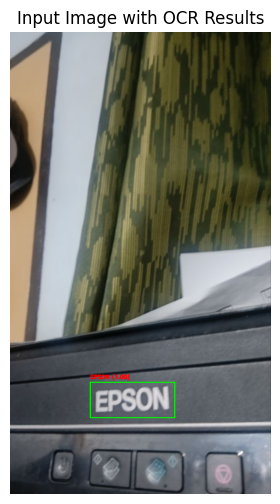

In [6]:
# Install EasyOCR if you haven't already
#pip install easyocr

import easyocr
import cv2
import matplotlib.pyplot as plt

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language(s) as needed, e.g., ['en', 'fr']

# Load the Image
image_path = "/content/1.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Convert BGR (OpenCV format) to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform OCR
results = reader.readtext(image_path)

# Display the Image and OCR Results
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Input Image with OCR Results")

# Print OCR Results
print("OCR Results:")
for (bbox, text, confidence) in results:
    print(f"Detected Text: {text} | Confidence: {confidence:.2f}")

    # Draw the bounding box and detected text on the image
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw rectangle around text
    cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
    # Add text
    cv2.putText(image_rgb, f"{text} ({confidence:.2f})", (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Show the updated image with annotations
plt.imshow(image_rgb)
plt.show()



Original Image OCR Results:
Detected Text: EPSON | Confidence: 1.00


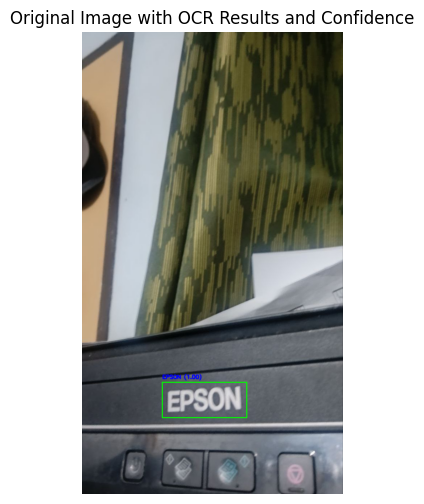


Translated Image OCR Results:
Detected Text: EPSON | Confidence: 1.00


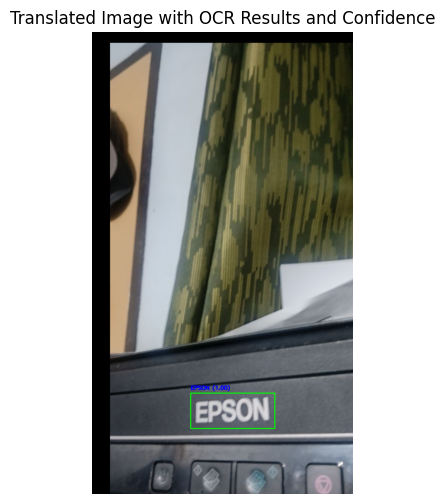


Rotated Image OCR Results:
Detected Text: 8 | Confidence: 0.13


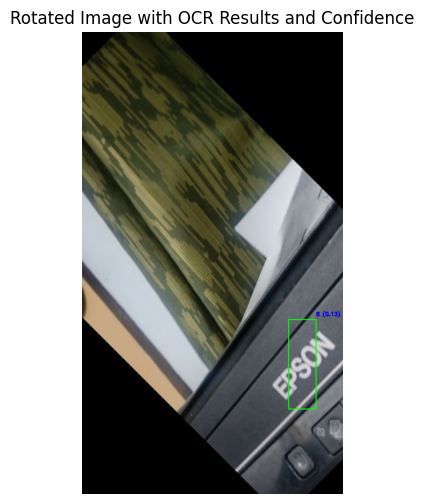


Scaled Image OCR Results:
Detected Text: EPSON | Confidence: 1.00


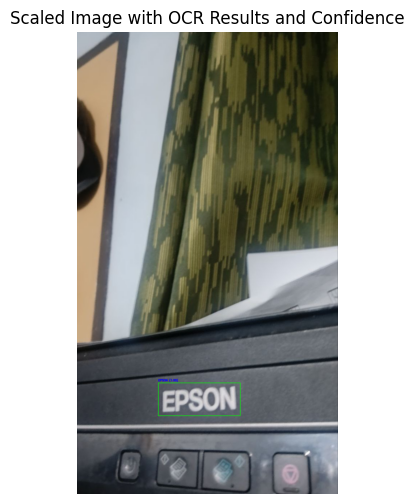

In [10]:
# Install EasyOCR if you haven't already
# pip install easyocr

import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language(s) as needed

# Load the Image
image_path = "/content/1.jpg"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Convert BGR (OpenCV format) to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # -------------------------
    # Apply Transformations
    # -------------------------

    # 1. Translation (move right and down)
    tx, ty = 50, 30
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

    # 2. Rotation (rotate by 45 degrees)
    center = (image.shape[1] // 2, image.shape[0] // 2)
    angle = 45
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    # 3. Scaling (resize to double size)
    sx, sy = 2, 2
    scaled_image = cv2.resize(image, None, fx=sx, fy=sy)

    # -------------------------
    # Perform OCR on Transformed Images
    # -------------------------

    transformations = {
        "Original": image,
        "Translated": translated_image,
        "Rotated": rotated_image,
        "Scaled": scaled_image,
    }

    for name, transformed_image in transformations.items():
        # Save transformed image for OCR processing
        temp_path = f"/content/temp_{name}.jpg"
        cv2.imwrite(temp_path, transformed_image)

        # Perform OCR
        results = reader.readtext(temp_path)

        # Display Results
        print(f"\n{name} Image OCR Results:")
        for (bbox, text, confidence) in results:
            print(f"Detected Text: {text} | Confidence: {confidence:.2f}")

            # Draw the bounding box and confidence level on the image
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, top_left))
            bottom_right = tuple(map(int, bottom_right))

            # Draw rectangle around detected text
            cv2.rectangle(transformed_image, top_left, bottom_right, (0, 255, 0), 2)
            # Add the detected text and confidence level
            cv2.putText(transformed_image, f"{text} ({confidence:.2f})",
                        (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Display the image with bounding boxes and confidence
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"{name} Image with OCR Results and Confidence")
        plt.show()



OCR Results on Affine-Transformed Image:


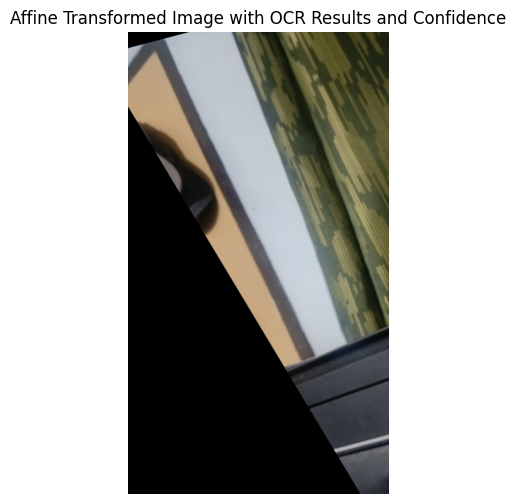

In [11]:
# Install EasyOCR if you haven't already
# pip install easyocr

import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language(s)

# Load the Image
image_path = "/content/1.jpg"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Convert the image to RGB format for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define source and destination points for affine transformation
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

    # Calculate the Affine Transformation Matrix
    affine_matrix = cv2.getAffineTransform(pts1, pts2)

    # Apply the affine transformation
    affine_transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

    # ------------------------------
    # Perform OCR on Affine-Transformed Image
    # ------------------------------
    # Save transformed image temporarily for OCR processing
    temp_affine_path = "/content/affine_transformed.jpg"
    cv2.imwrite(temp_affine_path, affine_transformed_image)
    affine_results = reader.readtext(temp_affine_path)

    # Display OCR Results for Transformed Image
    print("\nOCR Results on Affine-Transformed Image:")
    for (bbox, text, confidence) in affine_results:
        print(f"Detected Text: {text} | Confidence: {confidence:.2f}")

        # Draw the bounding box and confidence level on the transformed image
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Draw rectangle around detected text
        cv2.rectangle(affine_transformed_image, top_left, bottom_right, (0, 255, 0), 2)
        # Add the detected text and confidence level
        cv2.putText(affine_transformed_image, f"{text} ({confidence:.2f})",
                    (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # ------------------------------
    # Visualize Only Transformed Image with Bounding Boxes and Confidence Levels
    # ------------------------------
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(affine_transformed_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Affine Transformed Image with OCR Results and Confidence")
    plt.show()



OCR Results on Projective Transformed Image:
Detected Text: 1 | Confidence: 0.07


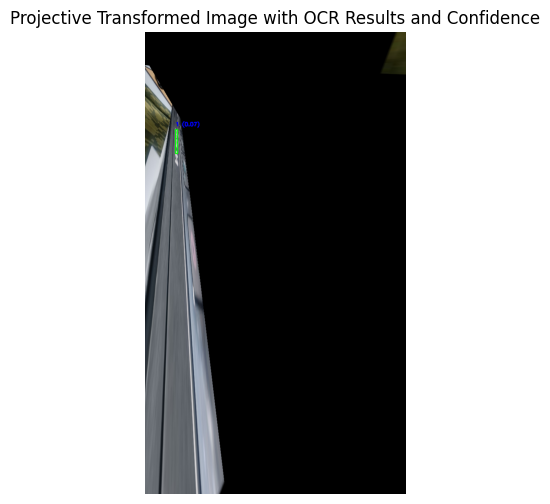

In [13]:
# Install EasyOCR if you haven't already
# pip install easyocr

import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language(s)

# Load the image from file
image_path = '1.jpg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load image.")
else:
    # Draw a red point at the original coordinates (50, 50) for demonstration
    cv2.circle(image, (50, 50), 5, (0, 0, 255), -1)

    # Define source and destination points for the homography transformation
    pts1 = np.float32([[50, 50], [image.shape[1], 50], [50, image.shape[0]], [image.shape[1], image.shape[0]]])
    pts2 = np.float32([[10, 100], [image.shape[1] - 50, 50], [100, 250], [220, image.shape[0] - 30]])

    # Calculate the Homography matrix
    homography_matrix, _ = cv2.findHomography(pts1, pts2)

    # Apply Homography
    projective_transformed_image = cv2.warpPerspective(image, homography_matrix, (image.shape[1], image.shape[0]))

    # ------------------------------
    # Perform OCR on Transformed Image
    # ------------------------------
    # Save transformed image temporarily for OCR processing
    temp_homography_path = "/content/homography_transformed.jpg"
    cv2.imwrite(temp_homography_path, projective_transformed_image)
    transformed_results = reader.readtext(temp_homography_path)

    # Display OCR Results for Transformed Image
    print("\nOCR Results on Projective Transformed Image:")
    for (bbox, text, confidence) in transformed_results:
        print(f"Detected Text: {text} | Confidence: {confidence:.2f}")

        # Draw the bounding box and confidence level on the transformed image
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Draw rectangle around detected text
        cv2.rectangle(projective_transformed_image, top_left, bottom_right, (0, 255, 0), 2)
        # Add the detected text and confidence level
        cv2.putText(projective_transformed_image, f"{text} ({confidence:.2f})",
                    (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # ------------------------------
    # Visualize the Transformed Image with OCR Results
    # ------------------------------
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(projective_transformed_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Projective Transformed Image with OCR Results and Confidence")
    plt.show()



Original Image OCR Results:
Detected Text: EPSON | Confidence: 1.00


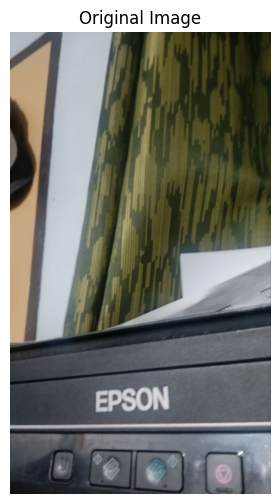


Translated Image OCR Results:
Detected Text: EPSON | Confidence: 1.00


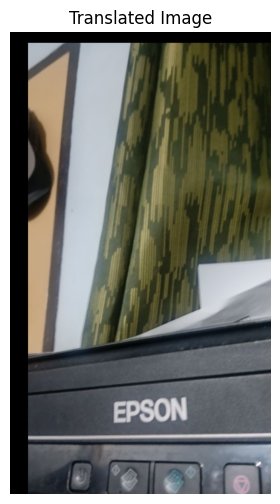


Rotated Image OCR Results:
Detected Text: 8 | Confidence: 0.13


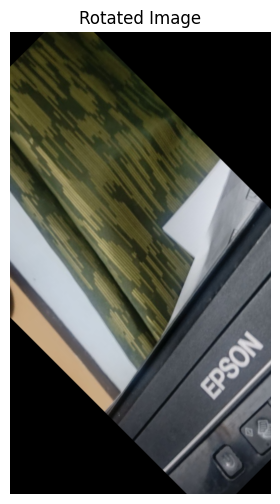


Scaled Image OCR Results:
Detected Text: EPSON | Confidence: 1.00


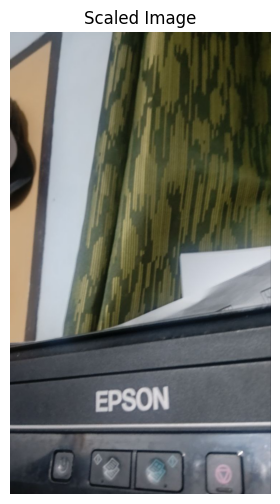

In [15]:
# Install EasyOCR if you haven't already
# pip install easyocr

import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language(s) as needed

# Load the Image
image_path = "/content/1.jpg"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Convert BGR (OpenCV format) to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # -------------------------
    # Apply Transformations
    # -------------------------

    # 1. Translation (move right and down)
    tx, ty = 50, 30
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

    # 2. Rotation (rotate by 45 degrees)
    center = (image.shape[1] // 2, image.shape[0] // 2)
    angle = 45
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    # 3. Scaling (resize to double size)
    sx, sy = 2, 2
    scaled_image = cv2.resize(image, None, fx=sx, fy=sy)

    # -------------------------
    # Perform OCR on Transformed Images
    # -------------------------

    transformations = {
        "Original": image,
        "Translated": translated_image,
        "Rotated": rotated_image,
        "Scaled": scaled_image,
    }

    for name, transformed_image in transformations.items():
        # Save transformed image for OCR processing
        temp_path = f"/content/temp_{name}.jpg"
        cv2.imwrite(temp_path, transformed_image)

        # Perform OCR
        results = reader.readtext(temp_path)

        # Display Results (without drawing bounding boxes or confidence)
        print(f"\n{name} Image OCR Results:")
        for (bbox, text, confidence) in results:
            print(f"Detected Text: {text} | Confidence: {confidence:.2f}")

        # Display the image without bounding boxes and confidence text
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"{name} Image")
        plt.show()


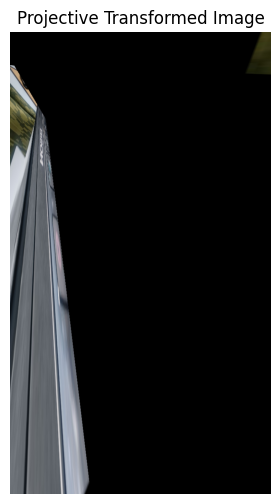

In [16]:
# Install EasyOCR if you haven't already
# pip install easyocr

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from file
image_path = '1.jpg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load image.")
else:
    # Draw a red point at the original coordinates (50, 50) for demonstration
    cv2.circle(image, (50, 50), 5, (0, 0, 255), -1)

    # Define source and destination points for the homography transformation
    pts1 = np.float32([[50, 50], [image.shape[1], 50], [50, image.shape[0]], [image.shape[1], image.shape[0]]])
    pts2 = np.float32([[10, 100], [image.shape[1] - 50, 50], [100, 250], [220, image.shape[0] - 30]])

    # Calculate the Homography matrix
    homography_matrix, _ = cv2.findHomography(pts1, pts2)

    # Apply Homography
    projective_transformed_image = cv2.warpPerspective(image, homography_matrix, (image.shape[1], image.shape[0]))

    # ------------------------------
    # Visualize the Transformed Image
    # ------------------------------
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(projective_transformed_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Projective Transformed Image")
    plt.show()


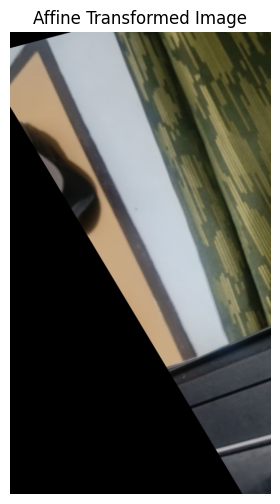

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Image
image_path = "/content/1.jpg"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Convert the image to RGB format for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define source and destination points for affine transformation
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

    # Calculate the Affine Transformation Matrix
    affine_matrix = cv2.getAffineTransform(pts1, pts2)

    # Apply the affine transformation
    affine_transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

    # ------------------------------
    # Visualize the Transformed Image
    # ------------------------------
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(affine_transformed_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Affine Transformed Image")
    plt.show()
